# Google Colab Lab Assignment -YOLO 11 Model

**Course Name:** [Deep Learning]

**Lab Title:** Yolo11 Fine Tuning And Object Detection using YOLO11 with COCO Dataset.

**Date of Submission:** [12-03-2025]

**Group Members**:

1.   202302040004 Nabil Ansari
2.   202302040009 Arya Sadalage
3.   202302040019 Gourav Sable



**Objective**
The purpose of this lab is to understand and implement YOLOv11 for real-time object detection. Students will perform dataset preparation, model implementation, inference, and performance evaluation.




**Task 1: Environment Setup and YOLOv11 Installation**

Objective: Set up the required libraries and dependencies to run YOLOv11.

**Instructions:**

1. Install Python and required libraries (PyTorch, OpenCV, Ultralytics, etc.).
2. Install YOLOv11 from the official repository.
3. Verify the installation by running a sample script.
4. **Expected Outcome:** A functional YOLOv11 environment ready for experimentation.


Wed Mar 12 08:20:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P0             25W /   70W |    1436MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

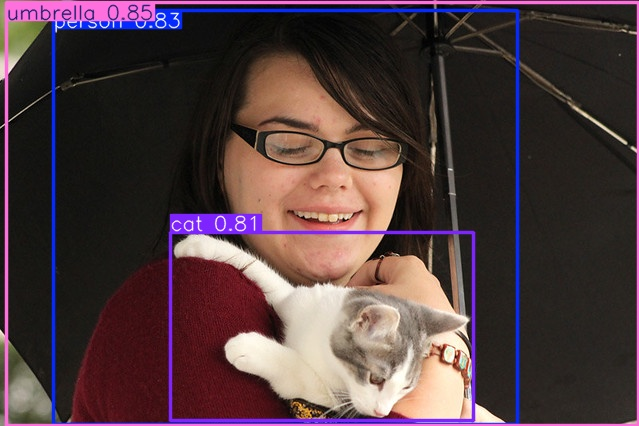

In [5]:
# Code Task 1
!nvidia-smi

!pip install ultralytics

# Import dependencies
import torch
import cv2
from ultralytics import YOLO

import os
HOME = os.getcwd()
print(HOME)

#  YOLOv11 installation
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='/content/catWithWomen.jpg' save=True

from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/predict/catWithWomen.jpg', width=600)

**Task 2: Dataset Preparation & Preprocessing**
Objective: Load and preprocess a dataset for object detection.

Instructions:

1. Choose a Dataset – Use COCO, Pascal VOC, or a custom dataset.
2. Annotate Images – If using a custom dataset, label objects using Roboflow or LabelImg.
3. Convert Annotations – Use Roboflow to export the dataset in YOLO format.
4. Download the Dataset – Use the Roboflow API to fetch the dataset.
5. Split the Dataset – Divide into train (80%), validation (10%), and test (10%).
5. **Expected Outcome:** A well-structured dataset in YOLO format.




In [6]:
#Code for Task. 2
!pip install roboflow
from roboflow import Roboflow

# Download COCO dataset
rf = Roboflow(api_key="Hc2tog6ASTYqgJSLOPet")
project = rf.workspace("microsoft").project("coco")
version = project.version(34)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



**Task 3: Training YOLOv11 Model**
Objective: Train YOLOv11 on the prepared dataset.

Instructions:

1. Configure the training parameters (batch size, epochs, learning rate).
2. Train the YOLOv11 model using the dataset.
3. Monitor training progress (loss, accuracy, mAP).
4. Save the trained model weights.
5. Expected Outcome: A trained YOLOv11 model ready for inference.






/content
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/COCO-Dataset-34/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

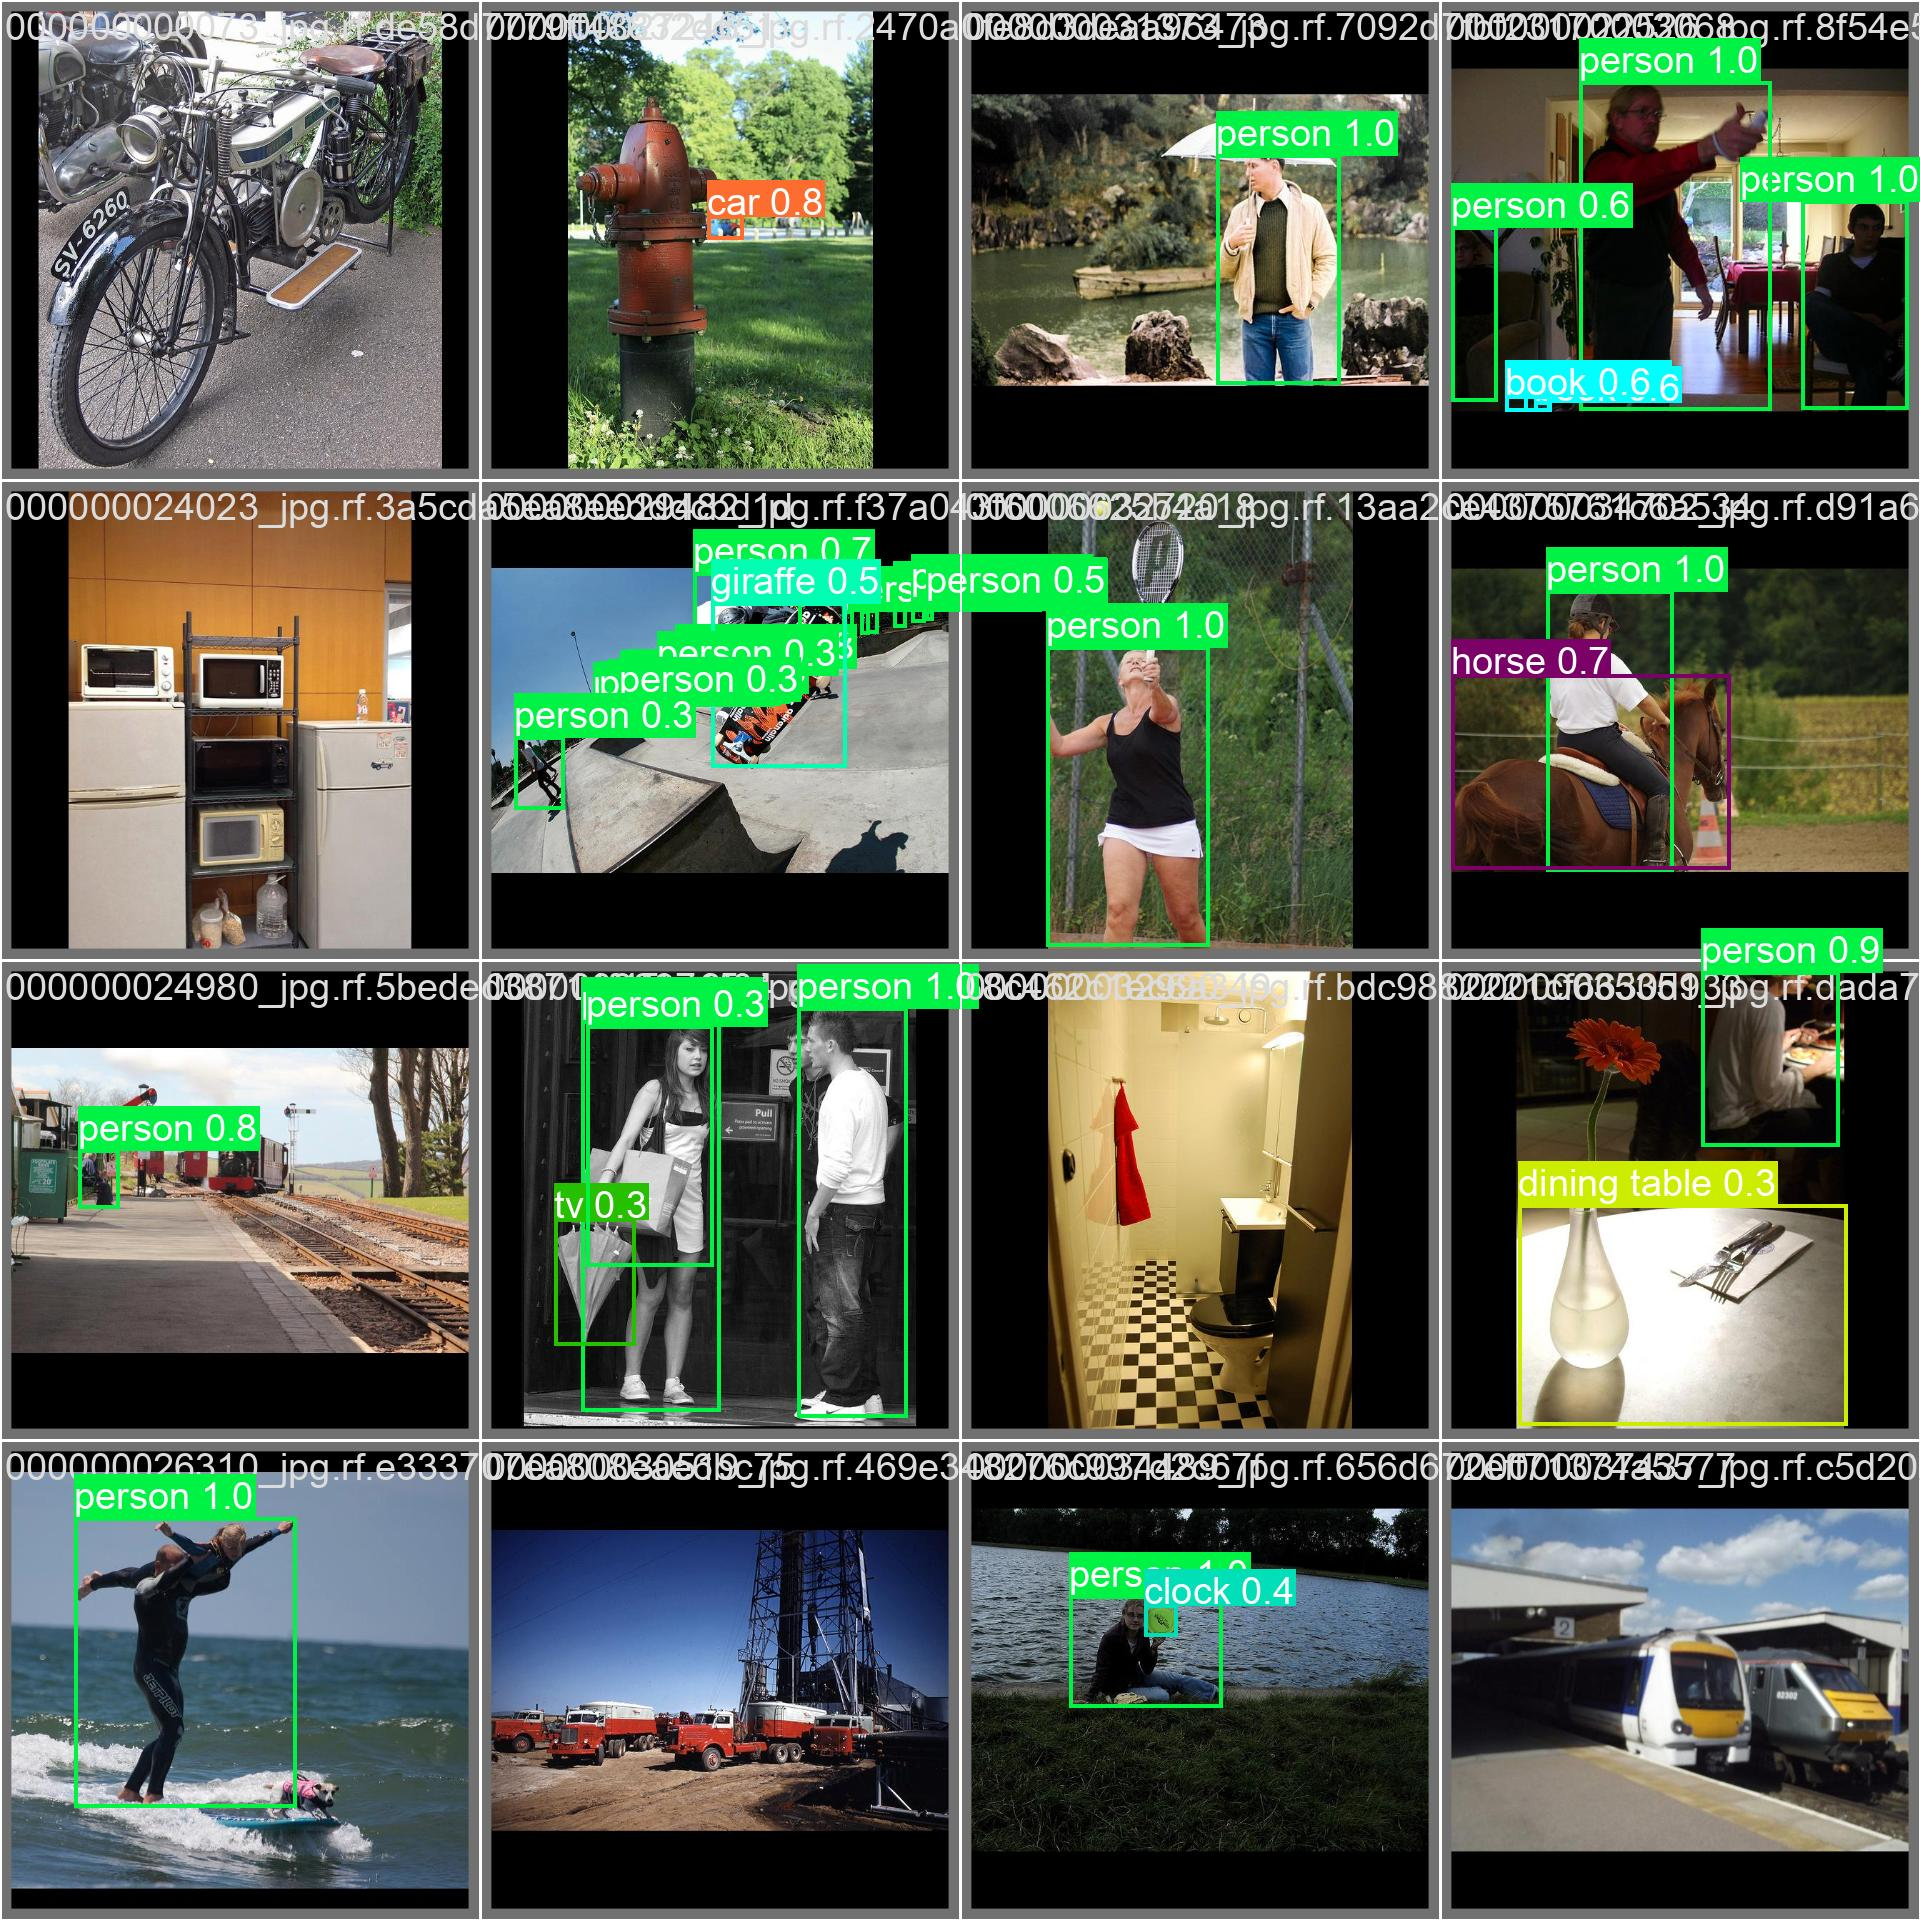

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

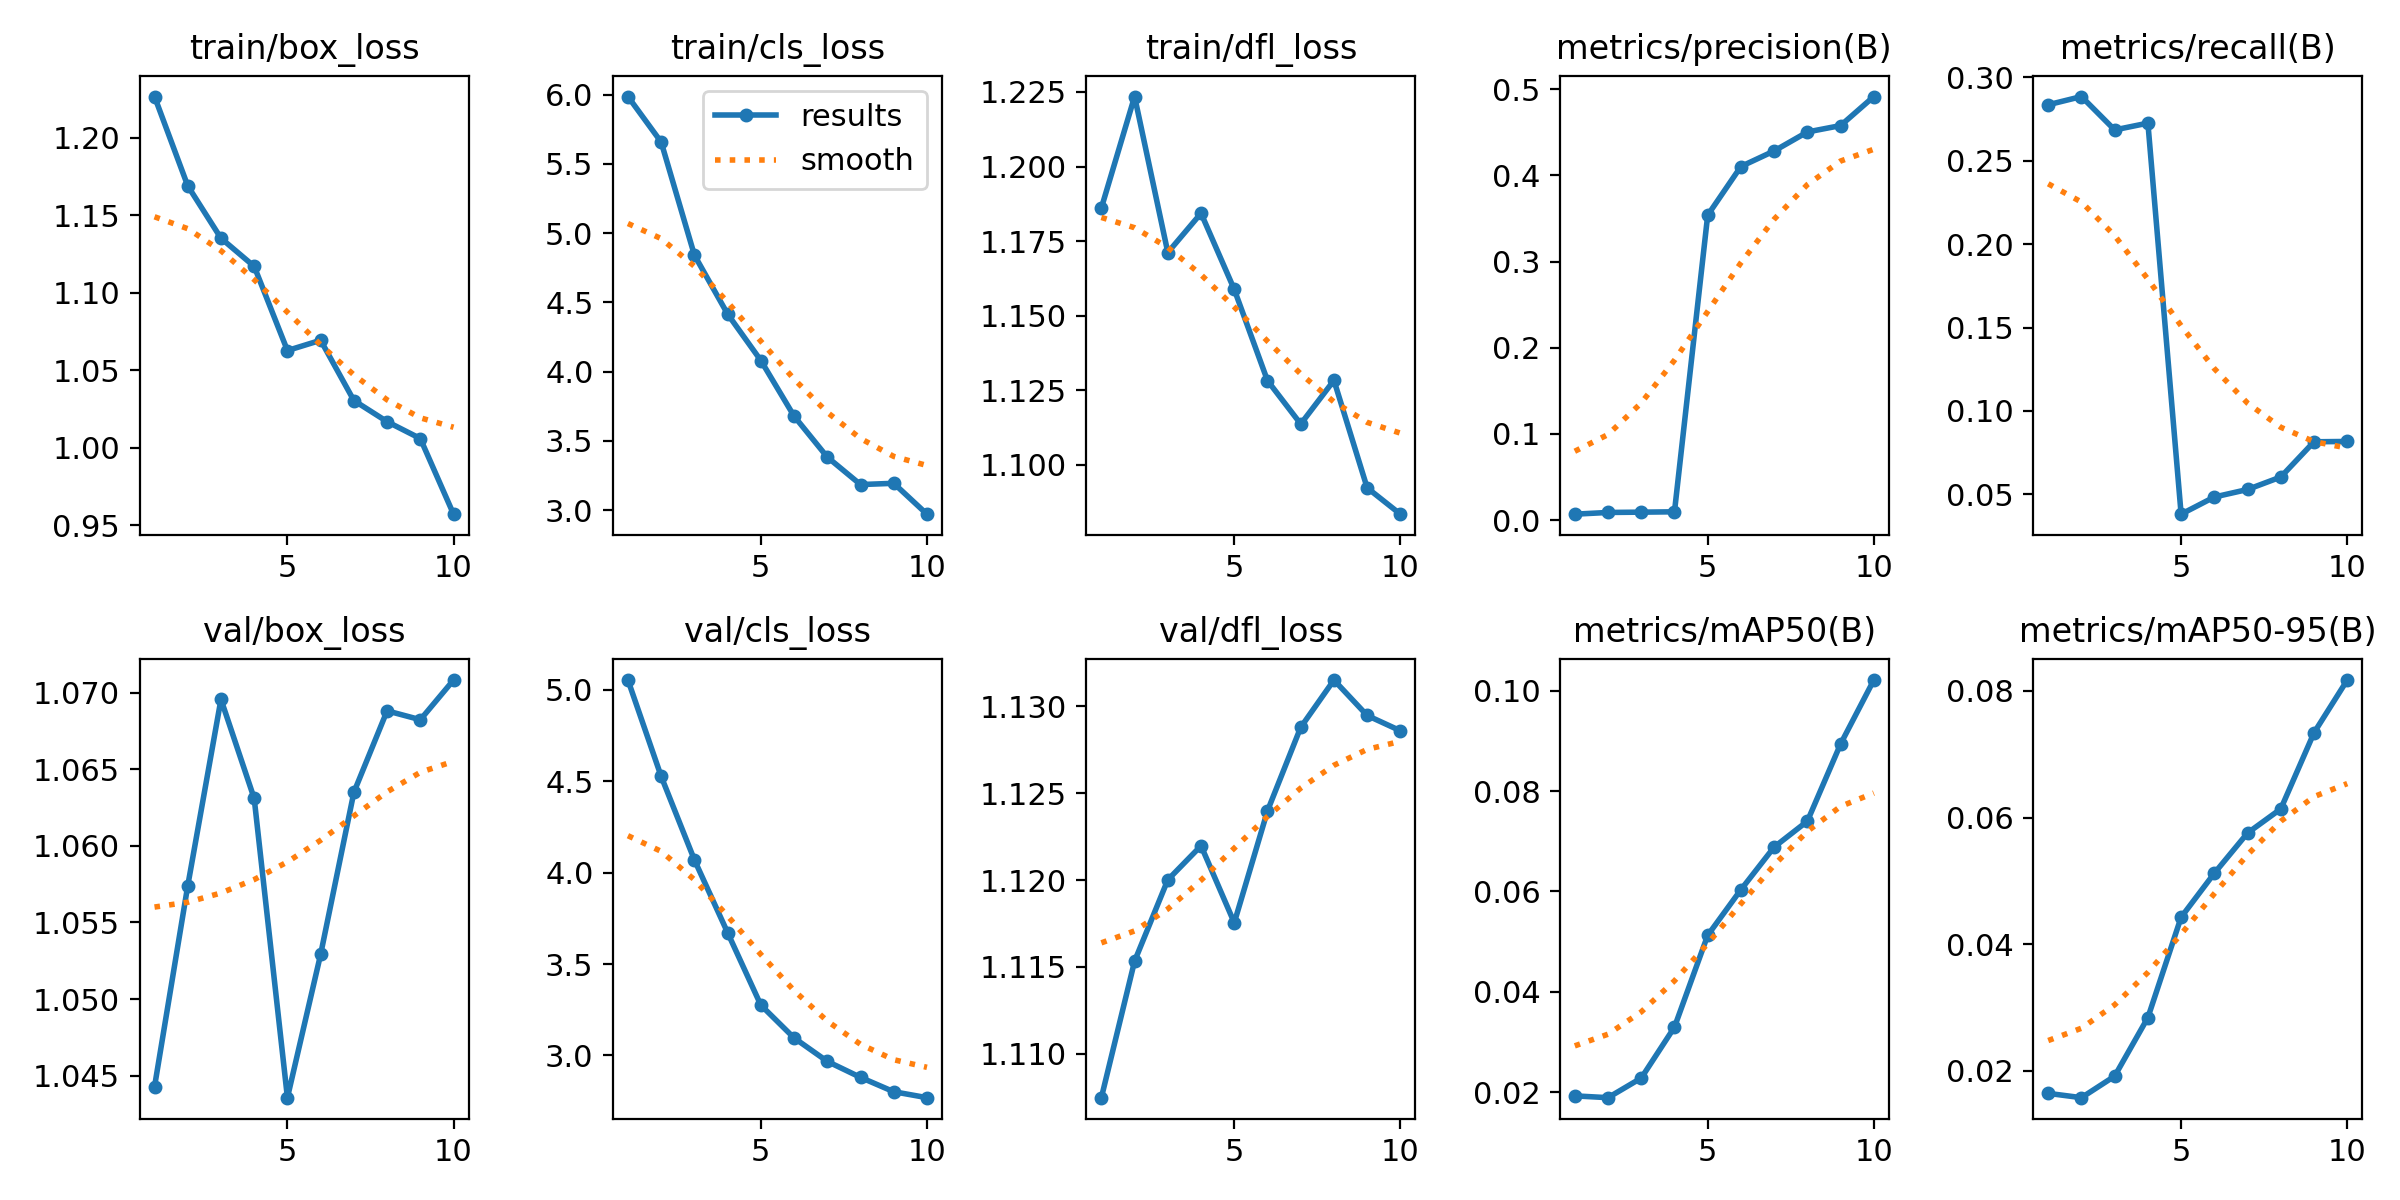

In [8]:
IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

**Task 4:**Model Inference and Evaluation
Objective: Test the trained model on new images and videos.

Instructions:

1.  Load the trained model weights.
2.  Run object detection on test images and videos.
3.  Evaluate the model performance using mAP (mean Average Precision), precision, recall.

✅ Mean Average Precision (mAP@50, mAP@50-95) – Measures model accuracy across different IoU thresholds.

✅ Precision & Recall – Evaluates the tradeoff between false positives and false negatives.

✅ F1 Score – Balances precision and recall for a comprehensive model assessment.

**Discuss the results in detail**
4.  Visualize results with bounding boxes.
5.  Expected Outcome: Detection results with bounding boxes and performance metrics.



**Discussion and Conclusion on Result Analysis** *##Add Text##*


Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,442,986 parameters, 0 gradients, 21.5 GFLOPs

image 1/19 /content/COCO-Dataset-34/test/images/000000005345_jpg.rf.48e7947456159d44cbe1a733ad832bf1.jpg: 640x640 (no detections), 23.4ms
image 2/19 /content/COCO-Dataset-34/test/images/000000005425_jpg.rf.96fb87ccc22e6e81c6a800fc4a1210dd.jpg: 640x640 1 person, 15.9ms
image 3/19 /content/COCO-Dataset-34/test/images/000000005443_jpg.rf.7698b7d1608db7698437777bdb4b8148.jpg: 640x640 1 person, 15.9ms
image 4/19 /content/COCO-Dataset-34/test/images/000000007673_jpg.rf.b81b3038dbd3417ecc6e9f0c001dbb4d.jpg: 640x640 2 persons, 15.8ms
image 5/19 /content/COCO-Dataset-34/test/images/000000010388_jpg.rf.ef62504c40a00ef9397268c2577ef323.jpg: 640x640 1 person, 15.8ms
image 6/19 /content/COCO-Dataset-34/test/images/000000011702_jpg.rf.7b8d407250e66f60388536beba62475d.jpg: 640x640 (no detections), 15.8ms
image 7/19 /content/COCO-Dataset

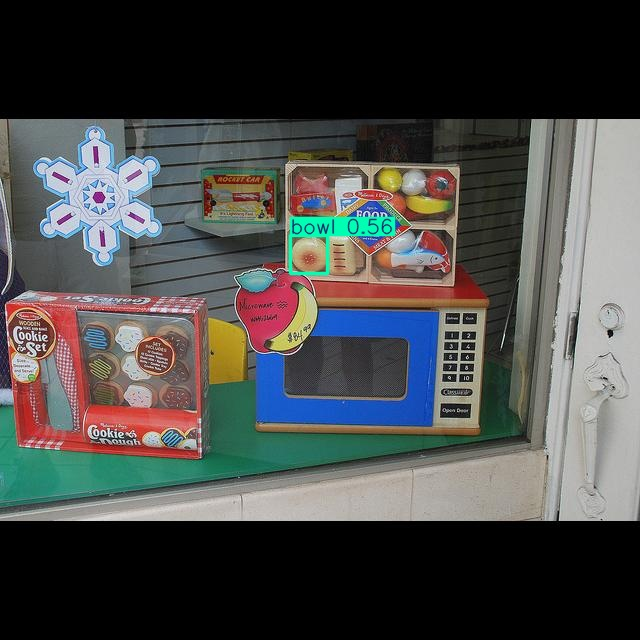

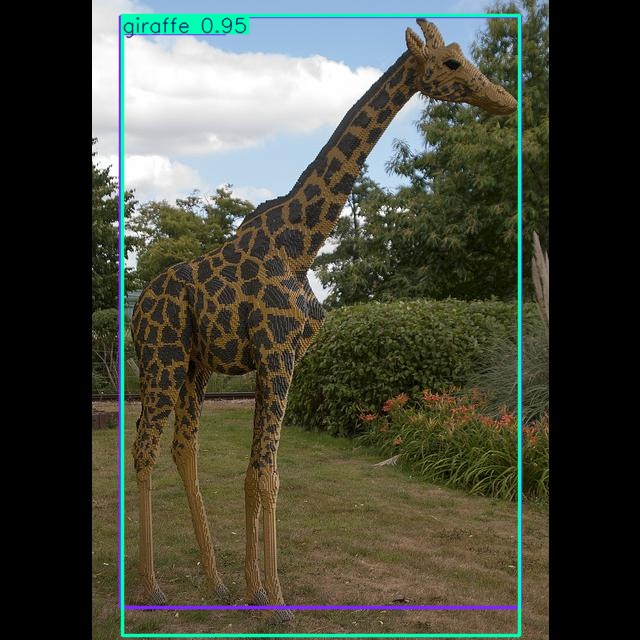

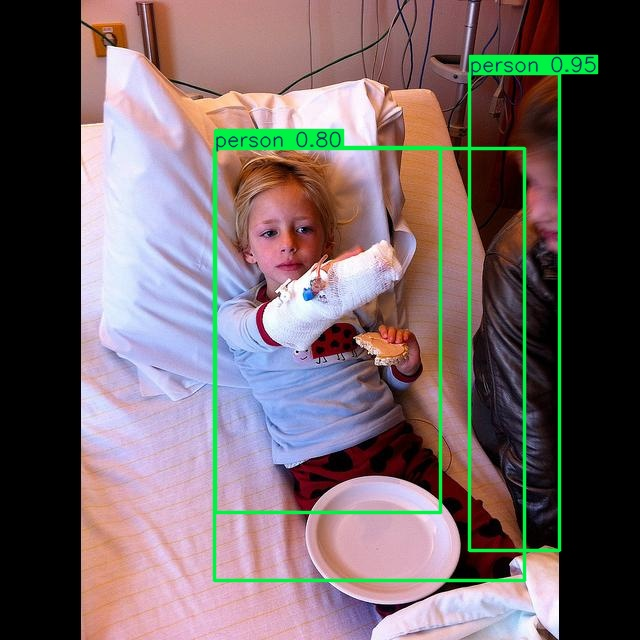

In [9]:
# Code for Task 4
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [14]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

model = YOLO('/content/runs/detect/train/weights/best.pt')
metrics = model.val()
# Mean Average Precision (mAP) across different IoU thresholds
map50_95 = metrics.box.map  # mAP@50-95
map50 = metrics.box.map50    # mAP@50
map75 = metrics.box.map75    # mAP@75

# mAP for each category (class)
maps_per_category = metrics.box.maps

print(f"mAP@50-95: {map50_95}")
print(f"mAP@50: {map50}")
print(f"mAP@75: {map75}")
print(f"mAP per category: {maps_per_category}")

precision = metrics.box.p  # Precision
recall = metrics.box.r        # Recall
f1 = metrics.box.f1        # f1

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,442,986 parameters, 0 gradients, 21.5 GFLOPs
val: Scanning /content/COCO-Dataset-34/valid/labels.cache... 55 images, 0 backgrounds, 0 corrupt: 100% 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.31it/s]
                   all         55        397      0.492     0.0817      0.101     0.0821
              backpack          1          1          0          0          0          0
                banana          1          2          1          0          0          0
          baseball bat          1          1          0          0          0          0
        baseball glove          1          4          0          0          0          0
                 bench          3          4          0          0          0          0
               bicycle          3          3      

val: Scanning /content/COCO-Dataset-34/valid/labels.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


                   all         55        397      0.492     0.0817      0.101     0.0821
              backpack          1          1          0          0          0          0
                banana          1          2          1          0          0          0
          baseball bat          1          1          0          0          0          0
        baseball glove          1          4          0          0          0          0
                 bench          3          4          0          0          0          0
               bicycle          3          3      0.509      0.333      0.403      0.285
                  bird          2          4          0          0          0          0
                  boat          1          1          1          0          0          0
                bottle          4          7      0.102      0.143     0.0312     0.0213
                   bus          3          3          0          0     0.0815     0.0742
                  cak

# **Results**

### Speed Metrics
The speed metrics indicate how fast the model processes each image during validation:
- **Preprocess**: Time taken to preprocess the image (e.g., resizing, normalization).
- **Inference**: Time taken for the model to make predictions.
- **Postprocess**: Time taken to postprocess the predictions (e.g., applying Non-Maximum Suppression).

**Results:**
- Preprocess: 6.6ms
- Inference: 12.6ms
- Postprocess: 7.1ms
- **Total Time per Image**: ~26.3ms (approximately 38 images per second)

### Mean Average Precision (mAP)
mAP measures the model's accuracy across different Intersection over Union (IoU) thresholds:
- **mAP@50-95**: Average precision over IoU thresholds from 0.50 to 0.95.
- **mAP@50**: Precision at an IoU threshold of 0.50.
- **mAP@75**: Precision at an IoU threshold of 0.75.

**Results:**
- mAP@50-95: 0.0821 (8.21%)
- mAP@50: 0.1006 (10.06%)
- mAP@75: 0.0936 (9.36%)

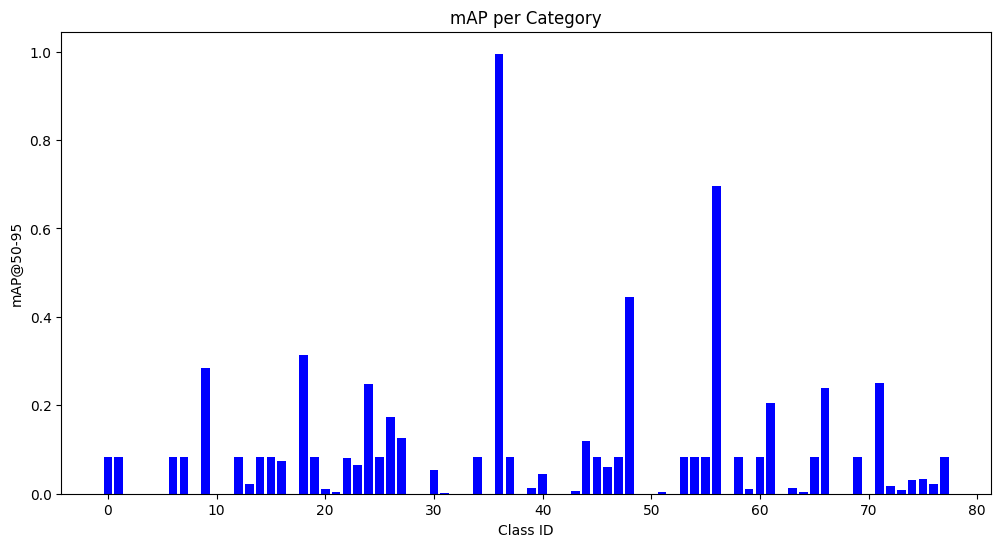

In [17]:
import matplotlib.pyplot as plt
maps_per_category = metrics.box.maps

# Plot mAP per category
plt.figure(figsize=(12, 6))
plt.bar(range(len(maps_per_category)), maps_per_category, color='blue')
plt.xlabel('Class ID')
plt.ylabel('mAP@50-95')
plt.title('mAP per Category')
plt.show()

### Precision, Recall, and F1-Score
- **Precision**: The ratio of true positives to all predicted positives (TP / (TP + FP)).
- **Recall**: The ratio of true positives to all actual positives (TP / (TP + FN)).
- **F1-Score**: The harmonic mean of precision and recall.



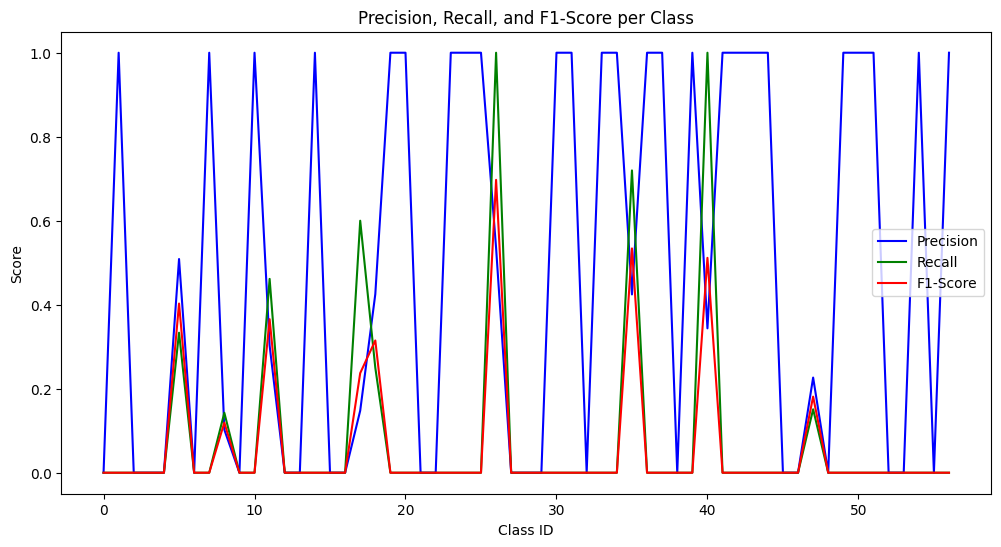

In [18]:

precision = metrics.box.p
recall = metrics.box.r
f1_score = metrics.box.f1

# Plot Precision, Recall, and F1-Score
plt.figure(figsize=(12, 6))
plt.plot(precision, label='Precision', color='blue')
plt.plot(recall, label='Recall', color='green')
plt.plot(f1_score, label='F1-Score', color='red')
plt.xlabel('Class ID')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score per Class')
plt.legend()
plt.show()

### Interpretation of Results
- **Low mAP**: The overall mAP@50-95 of 8.21% indicates that the model struggles to detect objects accurately across most classes.
- **Class Imbalance**: Some classes (e.g., Class 50 with 0.995 mAP) perform well, while others (e.g., Class 14 with 0.0213 mAP) perform poorly. This suggests class imbalance or insufficient training data for certain classes.
- **Low Precision and Recall**: Many classes have precision and recall values close to 0, indicating that the model either misses most objects (low recall) or makes many incorrect predictions (low precision).
- **High F1-Score for Some Classes**: A few classes (e.g., Class 26 with 0.6973 F1-Score) perform well, but most classes have low F1-Scores.

### Summary
The model achieves a low overall mAP of 8.21%, indicating poor detection performance. While some classes perform well, many classes have low precision, recall, and F1-Score. Recommendations for improvement include addressing class imbalance, improving data quality, and fine-tuning the model.

**Declaration**

We, Nabil Ansari, Arya Sadalage & Gourav Sable , confirm that the work submitted in this assignment is our own and has been completed following academic integrity guidelines. The code is uploaded on GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [https://github.com/nabil-repo/DL]

Signature: **Group Members**:

1.   202302040004 Nabil Ansari
2.   202302040009 Arya Sadalage
3.   202302040019 Gourav Sable

